<a href="https://colab.research.google.com/github/AvK1002/Unsupervised-Learning/blob/main/Unsupervised_learning_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('/content/force2020_data.csv')

In [2]:
data

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [3]:
data.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [4]:
data.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


In [5]:
data.drop('NPHI', axis=1, inplace=True)
data.drop('PEF', axis=1, inplace=True)

In [6]:
data['DTC'].fillna(data['DTC'].mean(), inplace=True)


In [7]:
data.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
DTC,0


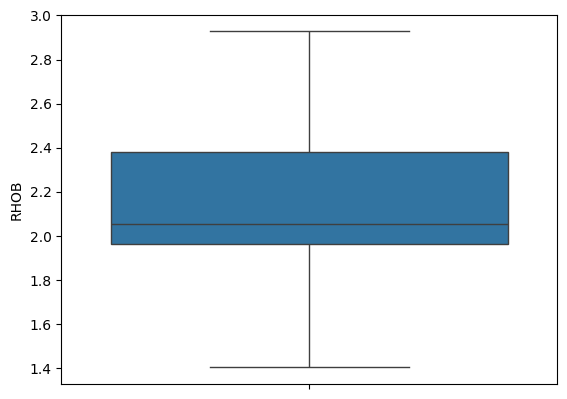

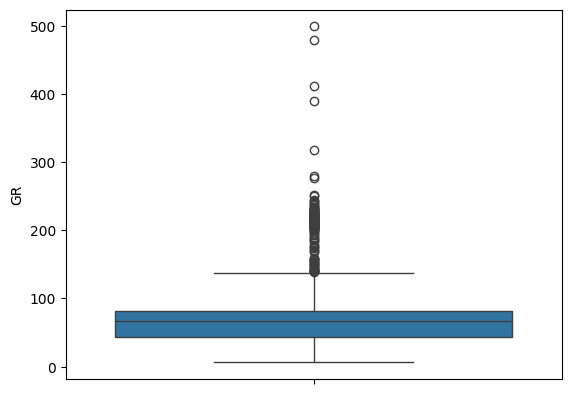

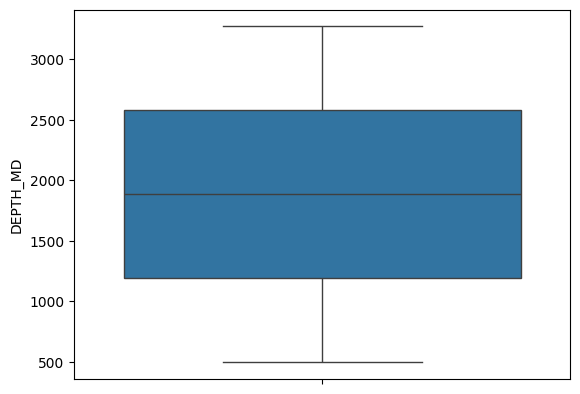

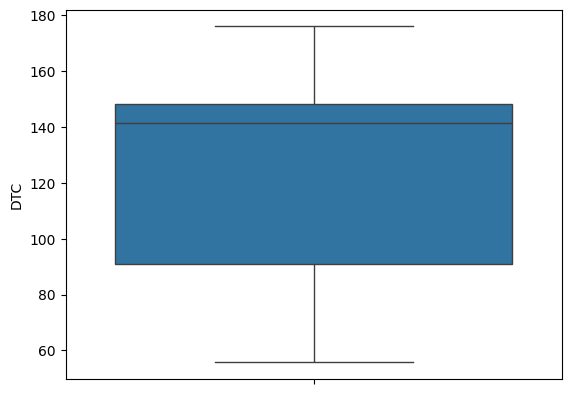

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
for column in data.columns:
  if pd.api.types.is_numeric_dtype(data[column]):
    sns.boxplot(data[column])        # PLOT THE sns graph
    plt.show()

In [9]:
# prompt: print the outliers in the GR column

Q1 = data['GR'].quantile(0.25)
Q3 = data['GR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['GR'] < lower_bound) | (data['GR'] > upper_bound)]
print(outliers['GR'])


14777    152.487183
14778    169.430511
14779    175.196609
14780    167.363678
14781    153.470978
            ...    
14919    147.066315
14920    142.472595
14921    141.150726
15535    146.297394
15536    150.266190
Name: GR, Length: 135, dtype: float64


In [10]:
outlier_columns = []
for col in data.columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  if data[col].min() < lower_limit or data[col].max() > upper_limit:
    outlier_columns.append(col)
print(outlier_columns)


['GR']


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)

In [12]:
data_scaled = pd.DataFrame(x_scaled, columns=data.columns)
data_scaled

,RHOB,GR,DEPTH_MD,DTC
0,-0.759999,0.571087,-1.731721,1.179232e+00
1,-0.741163,0.538331,-1.731532,1.161958e+00
2,-0.718560,0.383248,-1.731342,1.147887e+00
3,-0.734045,0.315393,-1.731152,1.147096e+00
4,-0.773944,0.275241,-1.730963,1.146405e+00
...,...,...,...,...
18265,1.745819,-1.551518,1.731081,4.651740e-16
18266,1.789158,-1.480786,1.731271,4.651740e-16
18267,1.917421,-1.438792,1.731461,4.651740e-16
18268,2.109002,-1.452527,1.731650,4.651740e-16


In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [14]:
pred_cluster = kmeans.predict(data_scaled)

In [15]:
pred_cluster

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

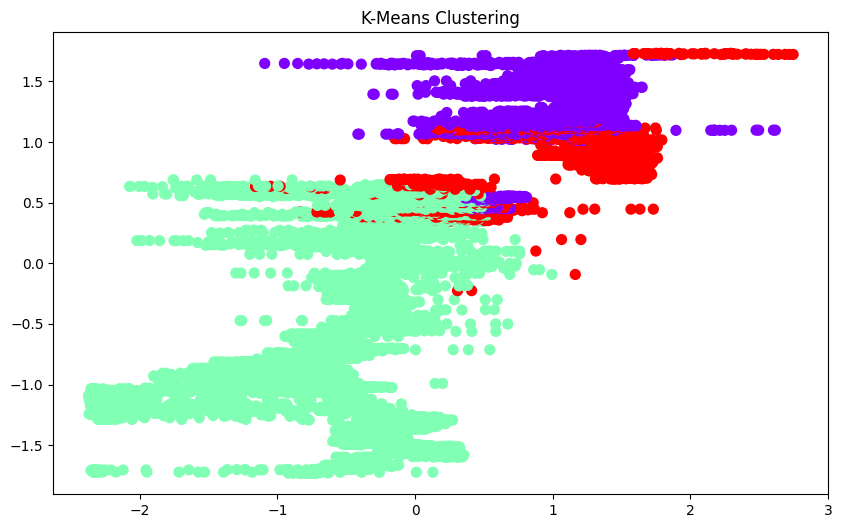

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled['RHOB'], data_scaled['DEPTH_MD'], c=pred_cluster, cmap = 'rainbow',s=50)
centroids = kmeans.cluster_centers_
plt.title('K-Means Clustering')
plt.show()

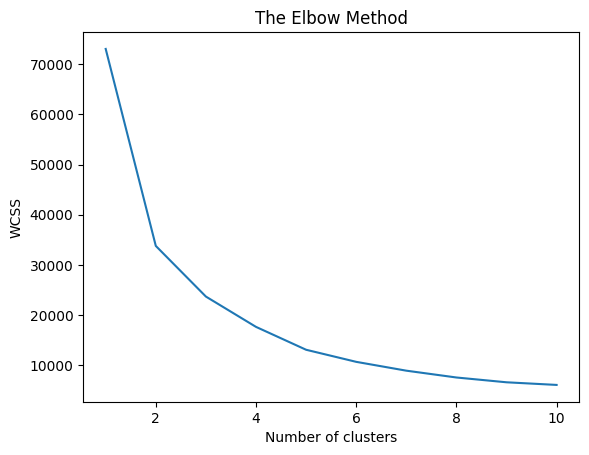

In [17]:
wcss = []
for i in  range(1,11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++',n_init = 10, random_state=42)
  kmeans.fit(data_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

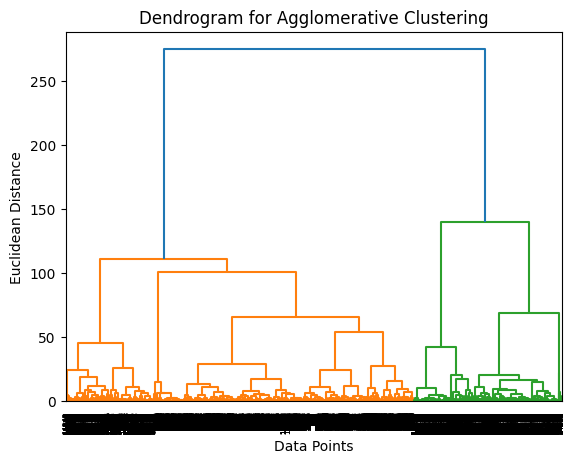

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data_scaled, method = 'ward')
plt.figure()
dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()